# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



In [42]:
ans = '17 campaigns'

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [47]:
# Analyzing the data for nulls, blanks and unknowns. Printing as percentage
def report_missing_values(df):
   
    missing_count = df.isnull().sum()

    missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(1)

    unknown_count = df.apply(lambda col: col.astype(str).isin(['unknown', 'unknowns', '']).sum())
    
    unknown_percentage = ((unknown_count / len(df)) * 100).round(1)

    missing_df = pd.DataFrame({
        'Column Name': missing_count.index,
        'Number of Missing Values': missing_count.values,
        'Missing Percentage': missing_percentage.values,
        'Unknown/Blank Count': unknown_count.values,
        'Unknown Percentage': unknown_percentage
    })
    
    return missing_df

print(report_missing_values(df))

                   Column Name  Number of Missing Values  Missing Percentage  \
age                        age                         0                 0.0   
job                        job                         0                 0.0   
marital                marital                         0                 0.0   
education            education                         0                 0.0   
default                default                         0                 0.0   
housing                housing                         0                 0.0   
loan                      loan                         0                 0.0   
contact                contact                         0                 0.0   
month                    month                         0                 0.0   
day_of_week        day_of_week                         0                 0.0   
duration              duration                         0                 0.0   
campaign              campaign          

### Data Summary

- The dataset contains **41,188 entries** and **21 columns**.
- There are **no missing values** (i.e., no nulls) in any of the columns.
- Some categorical columns have entries labeled as **"unknown"**, indicating unclear or missing information:
  - **job**: 330 unknowns (~0.8%)
  - **marital**: 80 unknowns (~0.2%)
  - **education**: 1,731 unknowns (~4.2%)
  - **default**: 8,597 unknowns (~20.9%) — **the highest** among all columns
  - **housing**: 990 unknowns (~2.4%)
  - **loan**: 990 unknowns (~2.4%)
- All other columns (e.g., `contact`, `month`, `day_of_week`, `duration`, etc.) have **0 unknown or missing values**.
- **Special processing** would be needed for  **default** as the %age is high
- **Impute** would work for the remaining as job, martial, etc are pretty generic and small in size, and mode could be a good assumption


In [48]:
# Creating a default column for unknowns
df['default_is_unknown'] = (df['default'] == 'unknown').astype(int)

#Imputing the Rest of the unknowns
columns_with_unknowns = ['job', 'marital', 'education', 'housing', 'loan']

for col in columns_with_unknowns:
    mode_value = df.loc[df[col] != 'unknown', col].mode()[0] 
    df[col] = df[col].replace('unknown', mode_value)

In [49]:
print(report_missing_values(df))

                           Column Name  Number of Missing Values  \
age                                age                         0   
job                                job                         0   
marital                        marital                         0   
education                    education                         0   
default                        default                         0   
housing                        housing                         0   
loan                              loan                         0   
contact                        contact                         0   
month                            month                         0   
day_of_week                day_of_week                         0   
duration                      duration                         0   
campaign                      campaign                         0   
pdays                            pdays                         0   
previous                      previous          

### Handling Missing or Unknown Values

In reviewing the dataset, I found that although there are no missing (null) values, several categorical features have entries labeled as "unknown." These needed special handling to ensure clean inputs for modeling.

- I created a new feature called `default_is_unknown` to capture whether the `default` field was unknown. This is because about **20.9%** of the entries in `default` were unknown, and it felt important to preserve this information separately.
  
- For other columns with smaller percentages of "unknown" values — namely `job`, `marital`, `education`, `housing`, and `loan` — I decided to impute the missing values.
  
- For each of these columns, I replaced the "unknown" entries with the **mode** (the most frequent value) from the known entries. This way, the imputation is simple, and I maintain the most common characteristic for each feature without introducing external bias.

This preprocessing step helps ensure that the dataset is fully clean, allowing me to proceed confidently with building the ML models in this project


### Visualizing the DataFrame

To better understand the dataset, I created a visualization function that generates plots for both numerical and categorical features.

- For **numerical columns**, I plot **histograms** to see the distribution of values across the dataset.
- For **categorical columns**, I generate **bar charts** to display the frequency of the top categories.

The function takes two parameters:
- `df`: the DataFrame that I want to visualize.
- `top_n_categories`: an optional setting (default is 20) to control how many top categories to show in each categorical bar chart.

This approach helps me quickly identify patterns, skewness, or irregularities in the data, which can guide further preprocessing or feature engineering.


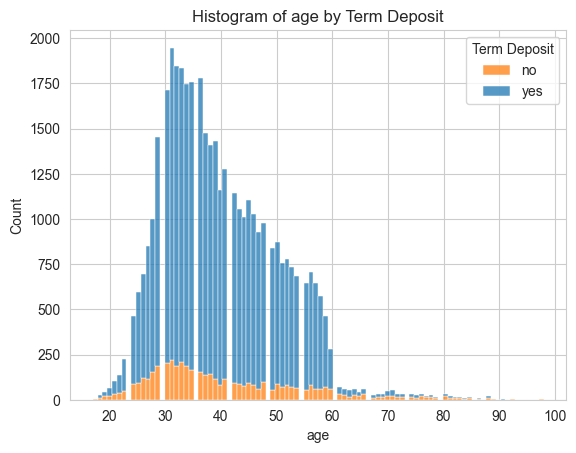

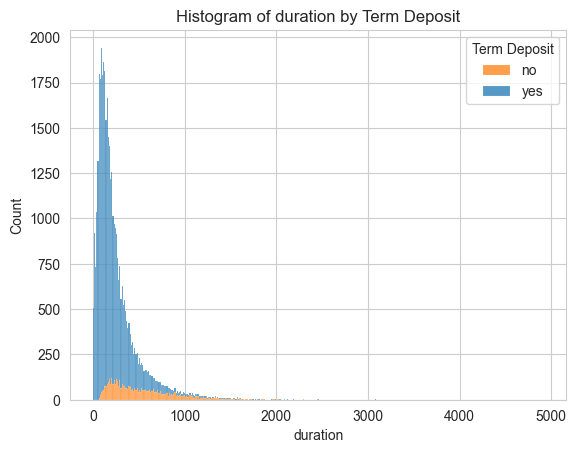

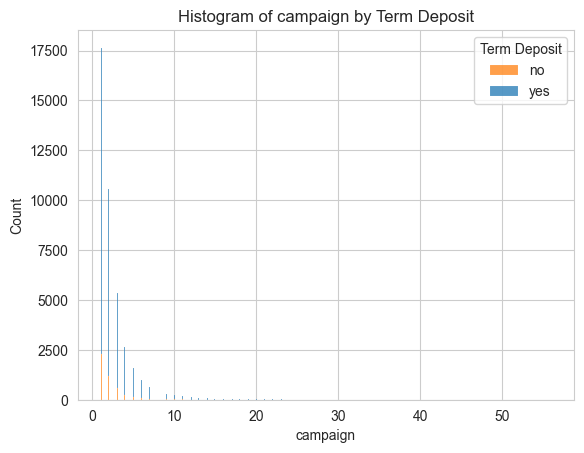

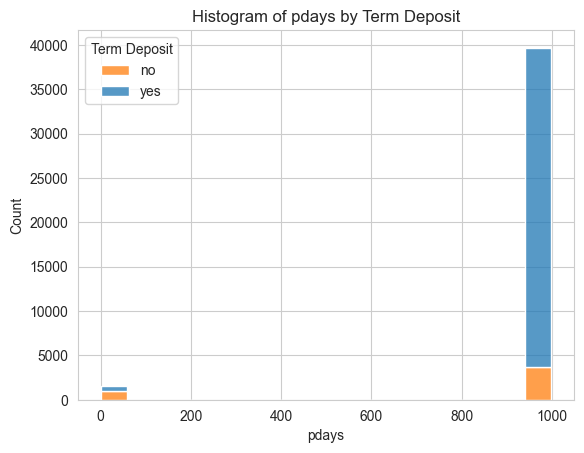

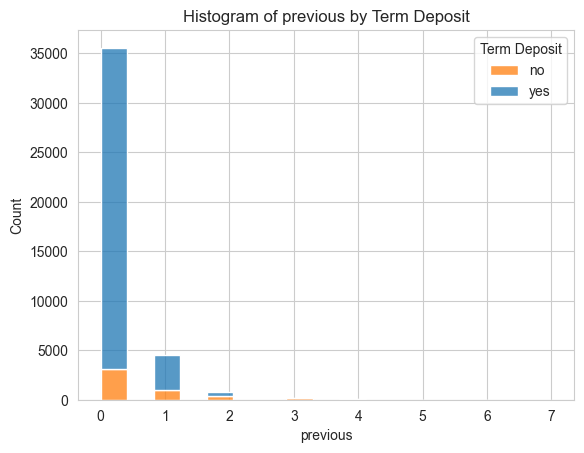

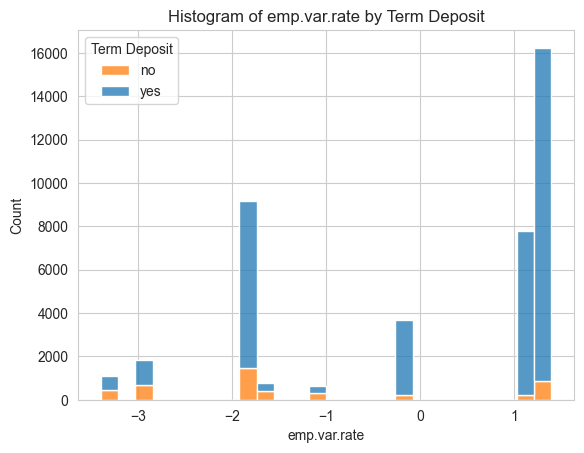

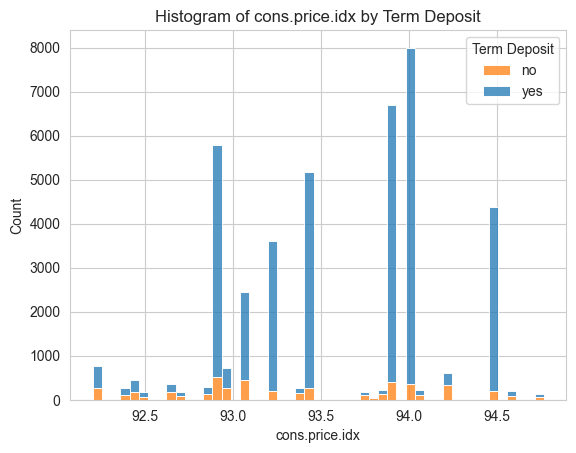

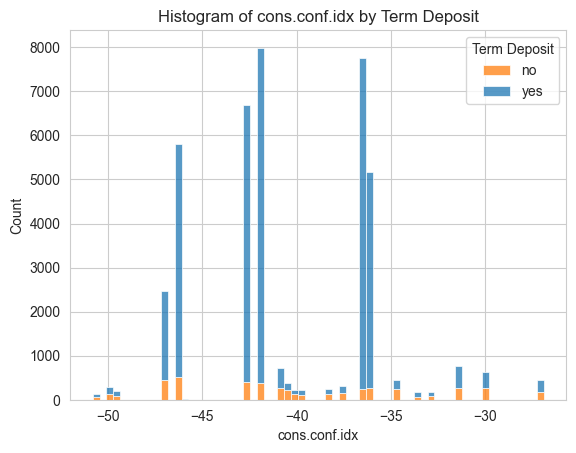

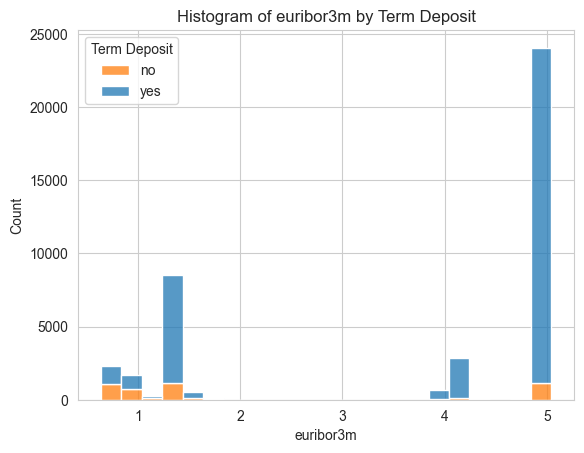

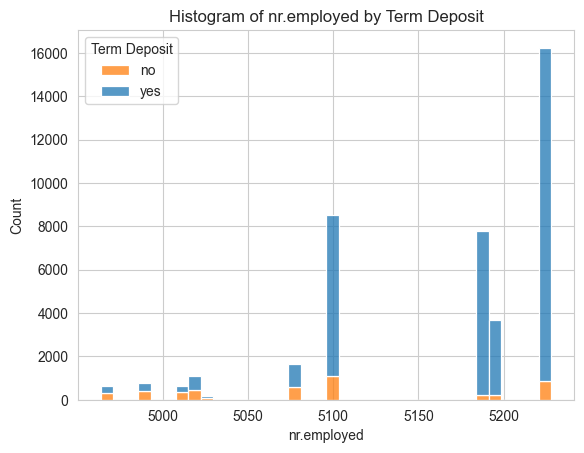

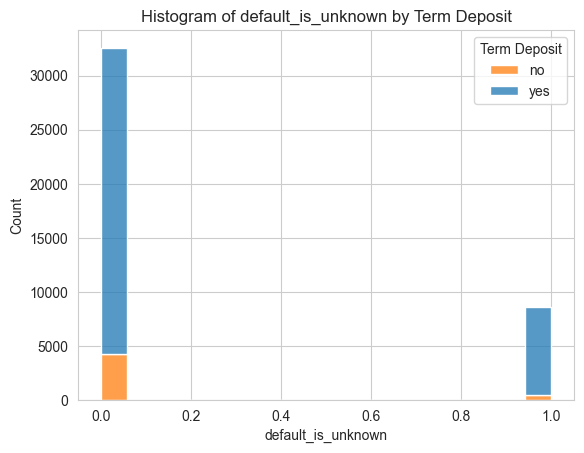

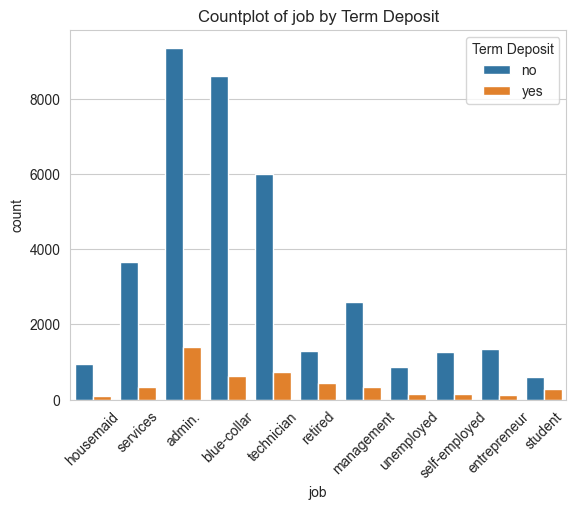

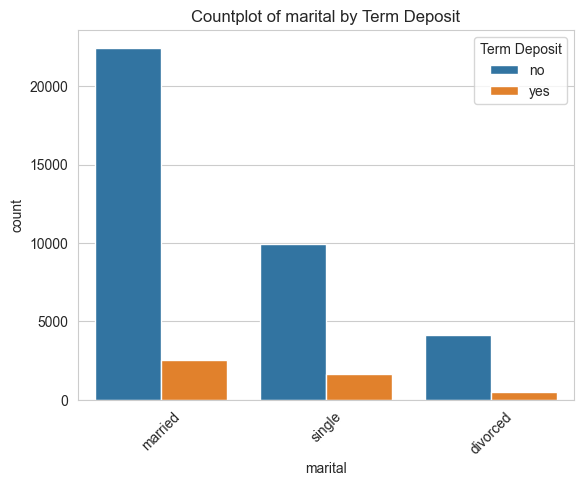

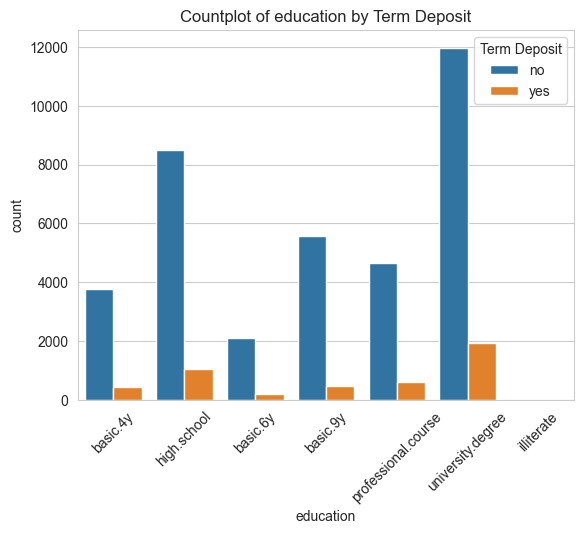

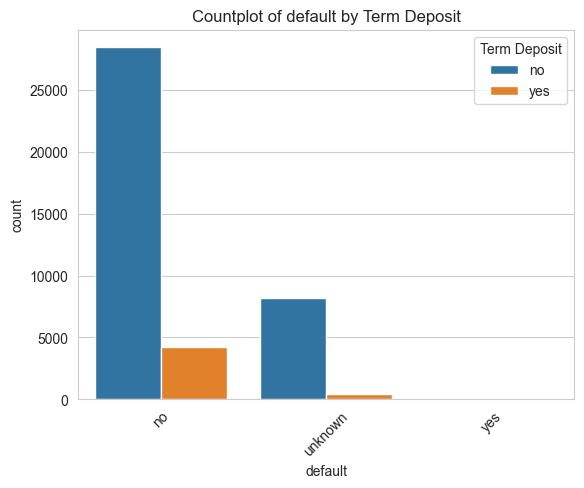

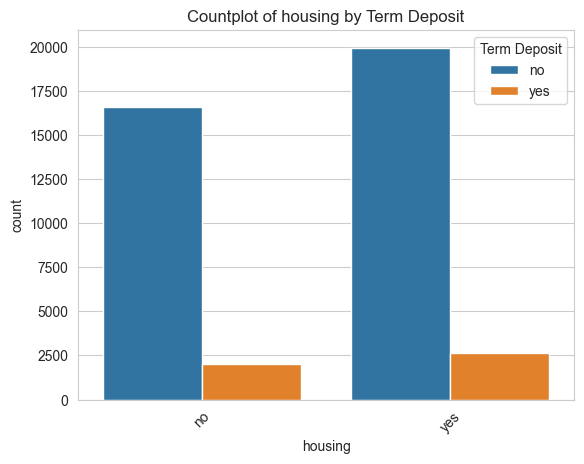

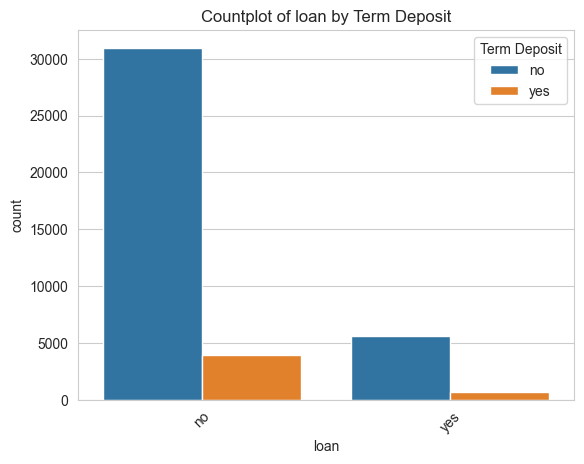

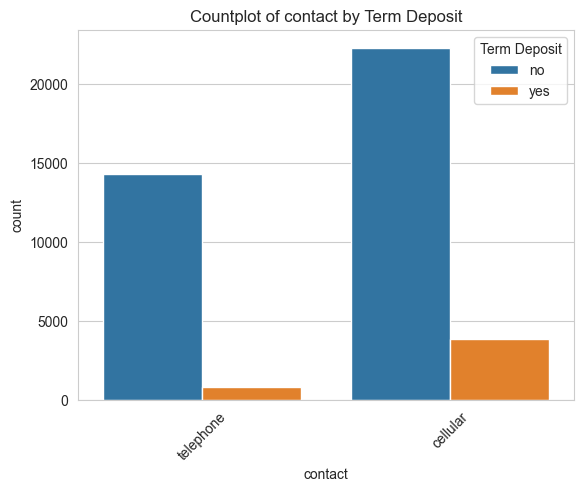

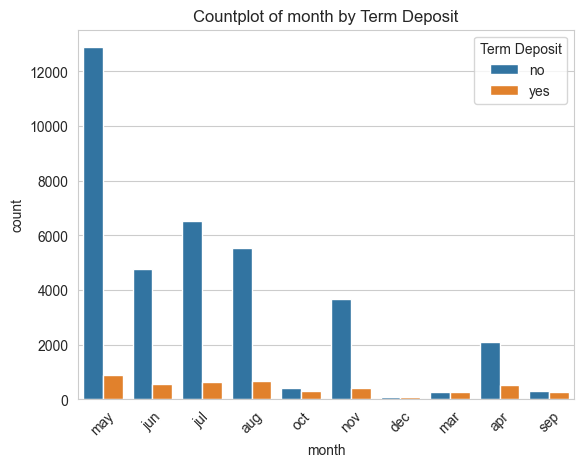

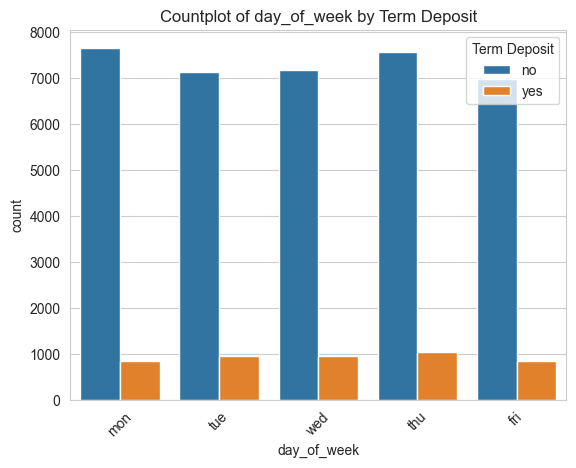

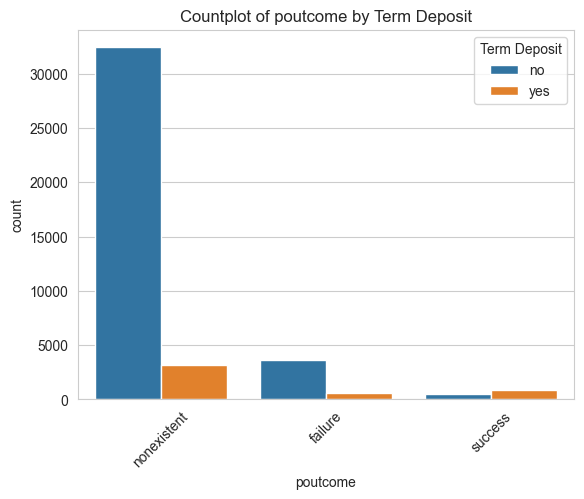

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


def visualize_dataframe_with_overlay(df, overlay_col='y', overlay_label='Term Deposit'):
    numerical_cols = df.select_dtypes(include='number').columns
    categorical_cols = df.select_dtypes(include='object').columns.drop(overlay_col)

    #Numerical columns 
    for col in numerical_cols:
        sns.histplot(data=df, x=col, hue=overlay_col, multiple="stack")
        plt.title(f"Histogram of {col} by {overlay_label}")
        plt.legend(title=overlay_label, labels=df[overlay_col].unique())
        plt.show()

    #Categorical columns
    for col in categorical_cols:
        sns.countplot(data=df, x=col, hue=overlay_col)
        plt.title(f"Countplot of {col} by {overlay_label}")
        plt.legend(title=overlay_label)
        plt.xticks(rotation=45)
        plt.show()

visualize_dataframe_with_overlay(df, 'y', 'Term Deposit')



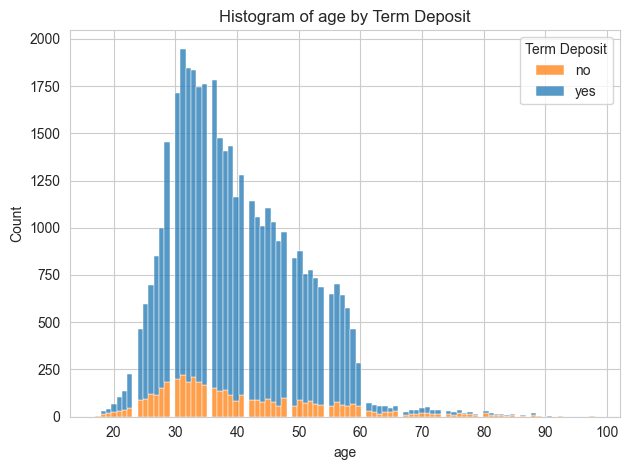

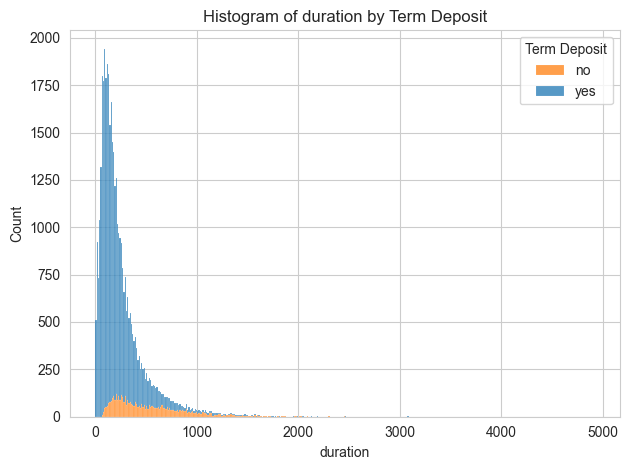

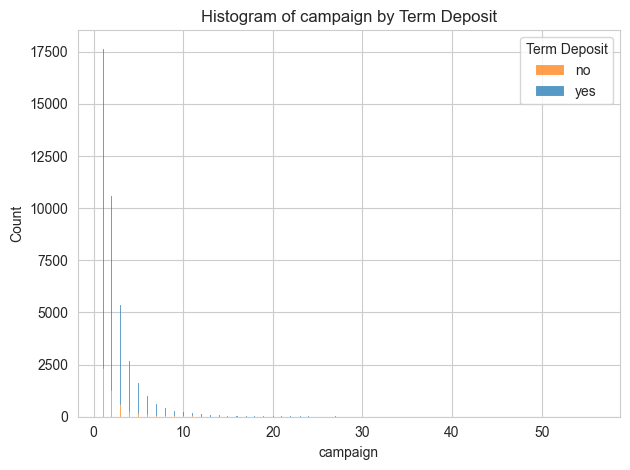

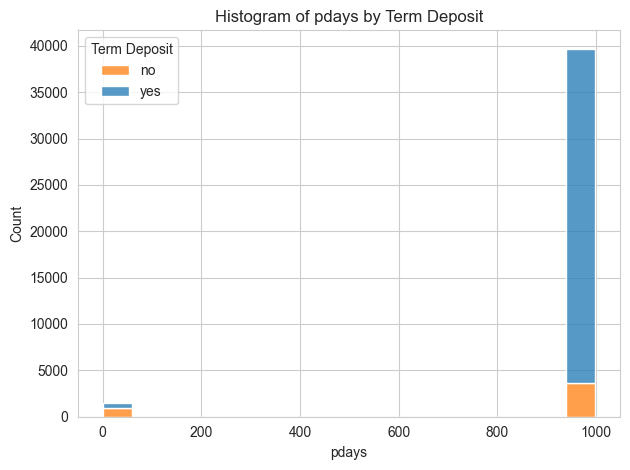

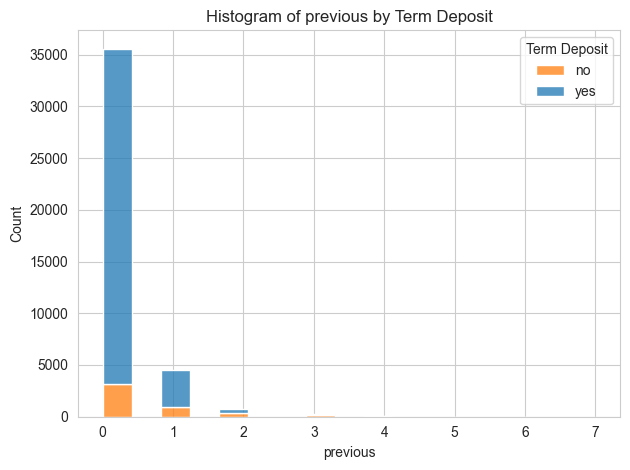

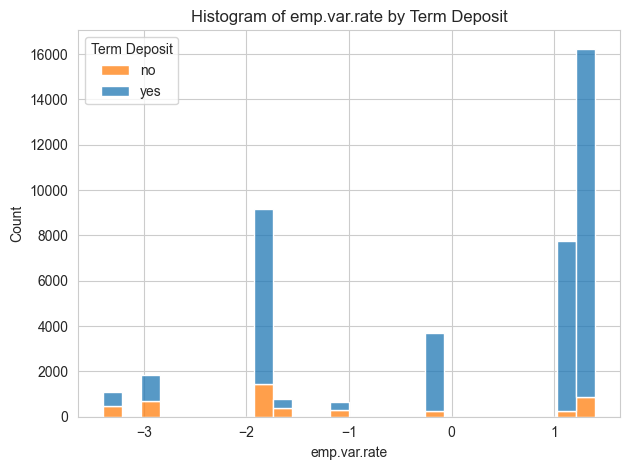

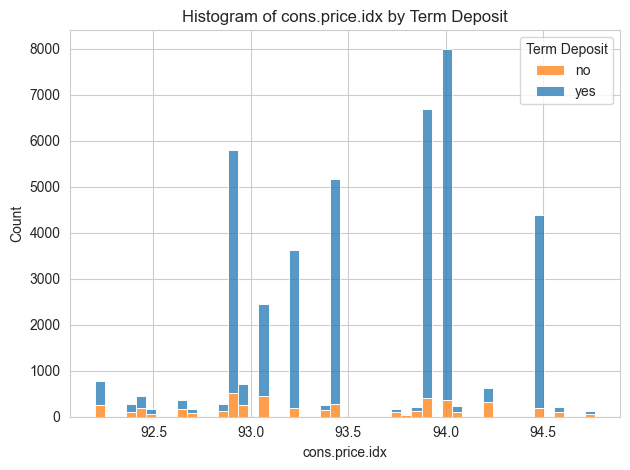

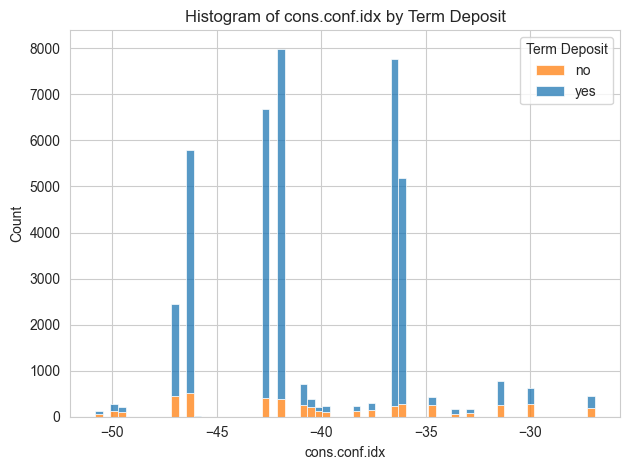

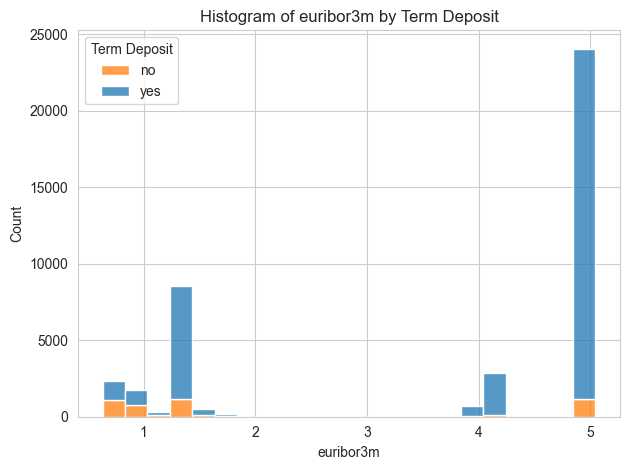

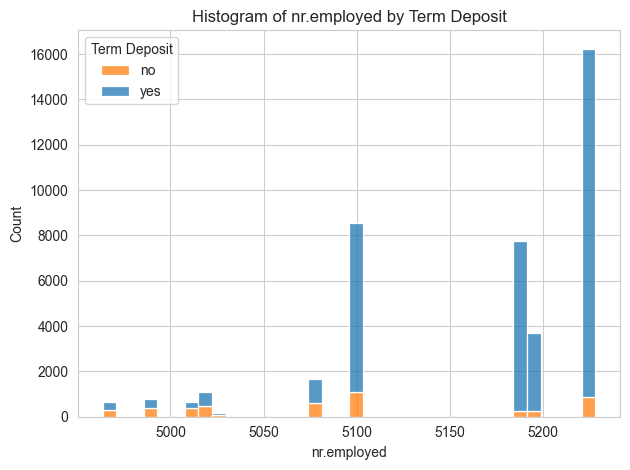

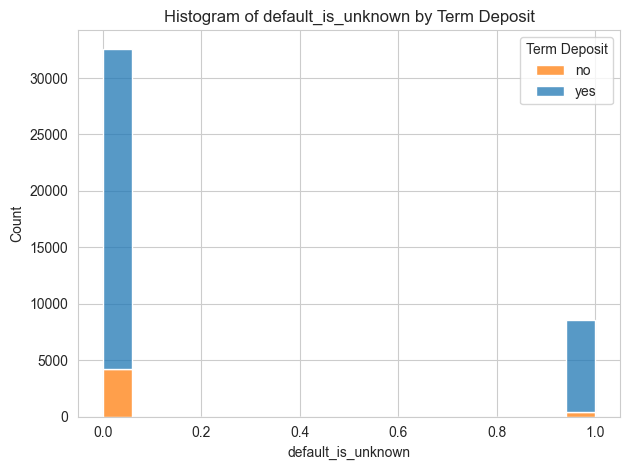

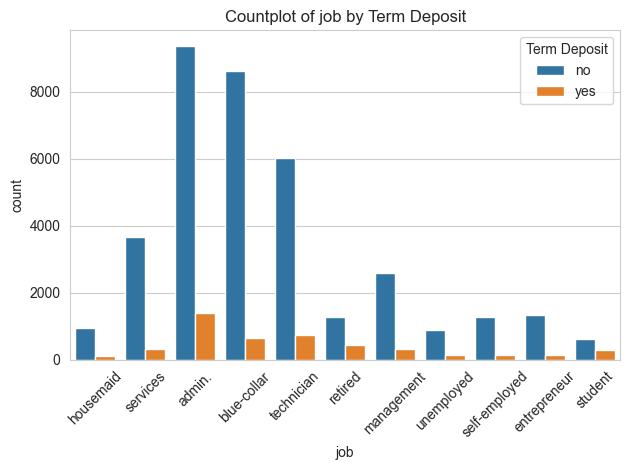

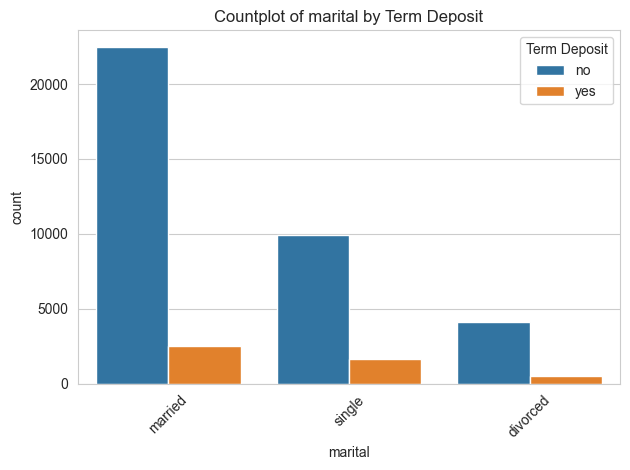

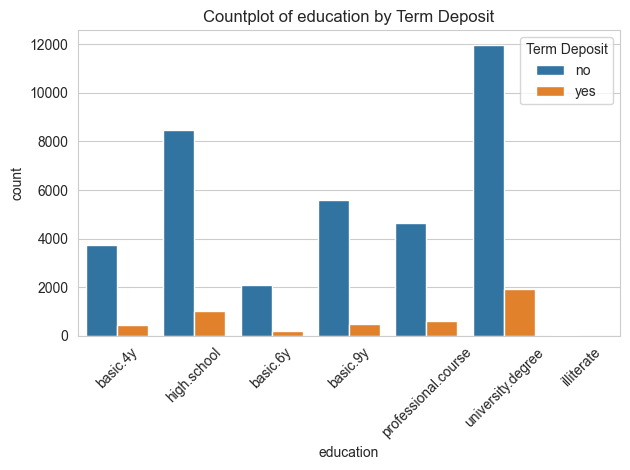

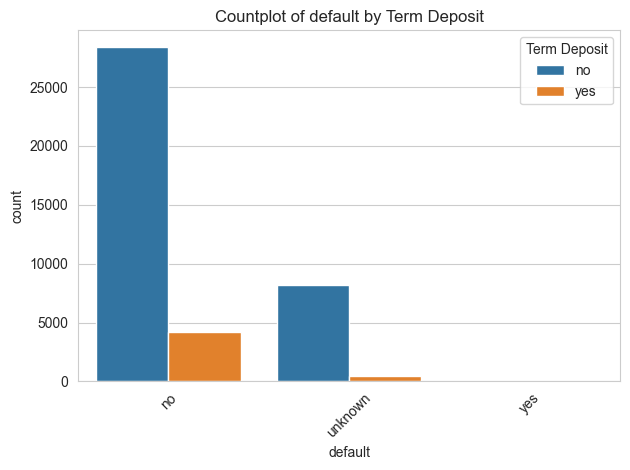

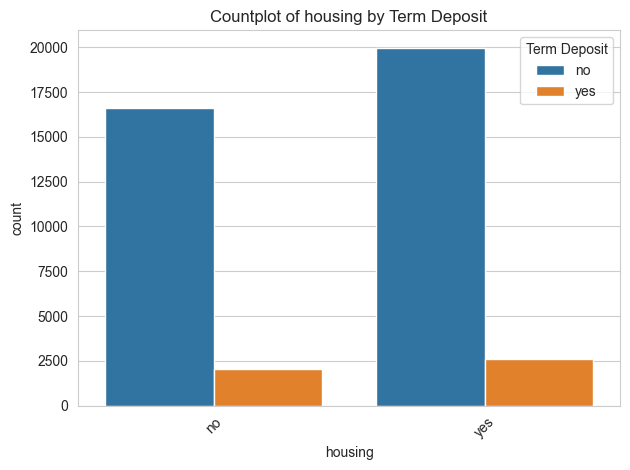

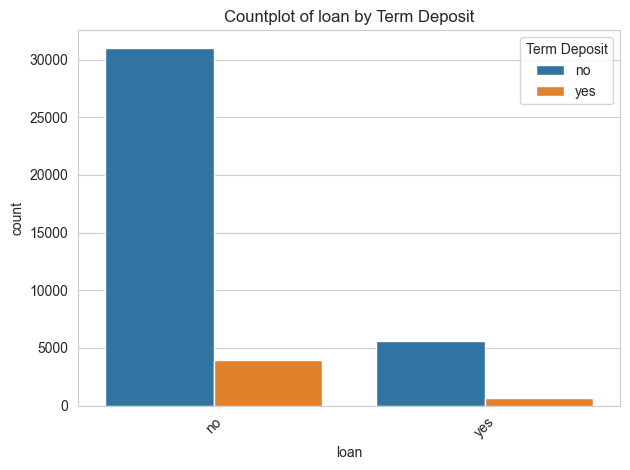

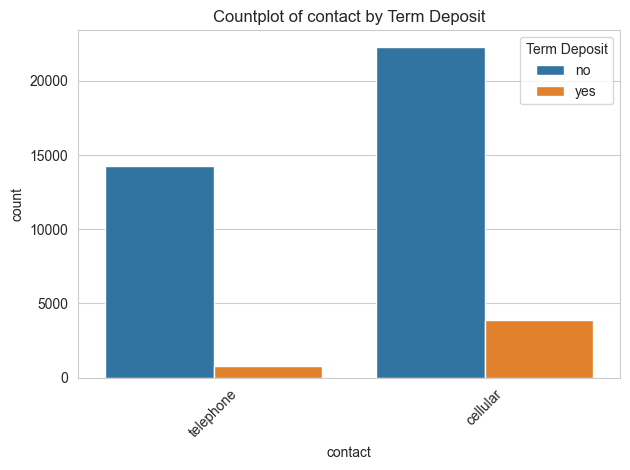

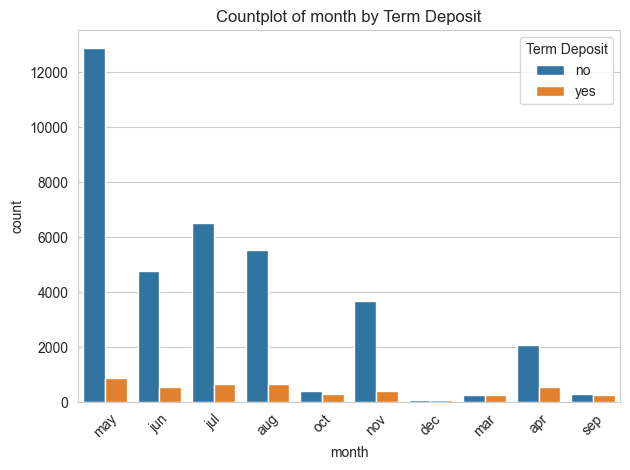

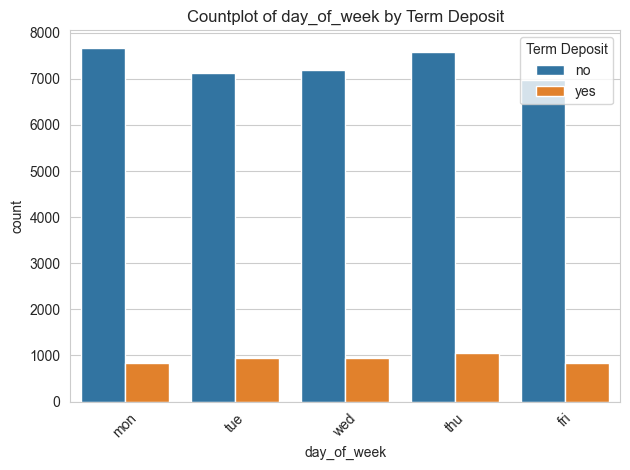

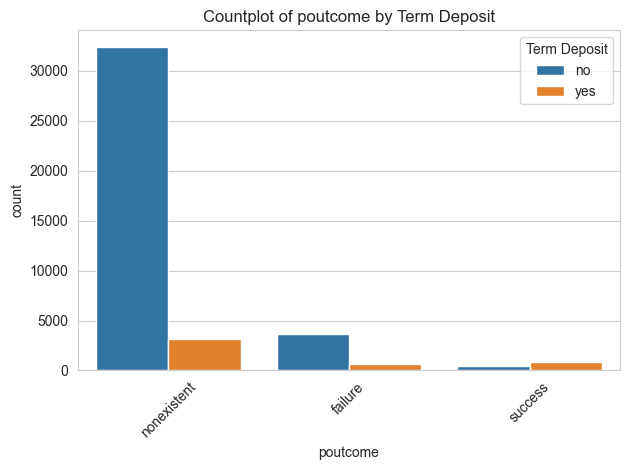

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

def visualize_and_save_to_pdf(df, overlay_col='y', overlay_label='Term Deposit', pdf_filename='plots.pdf'):
    numerical_cols = df.select_dtypes(include='number').columns
    categorical_cols = df.select_dtypes(include='object').columns.drop(overlay_col)

    with PdfPages(pdf_filename) as pdf:
        # Numerical columns
        for col in numerical_cols:
            plt.figure()
            sns.histplot(data=df, x=col, hue=overlay_col, multiple="stack")
            plt.title(f"Histogram of {col} by {overlay_label}")
            plt.legend(title=overlay_label, labels=df[overlay_col].unique())
            plt.tight_layout()
            pdf.savefig()  # saves the current figure into the PDF
            plt.show()
            plt.close()

        # Categorical columns
        for col in categorical_cols:
            plt.figure()
            sns.countplot(data=df, x=col, hue=overlay_col)
            plt.title(f"Countplot of {col} by {overlay_label}")
            plt.legend(title=overlay_label)
            plt.xticks(rotation=45)
            plt.tight_layout()
            pdf.savefig()
            plt.show()
            plt.close()

# Usage:
visualize_and_save_to_pdf(df, 'y', 'Term Deposit', 'All_Plots.pdf')


### Exploratory Visualizations Summary

To better understand the data distribution and its potential impact on term deposit subscription (our target variable), I created a series of histograms and count plots. Here’s what I observed and assumed based on the visual trends:

- **Age**: Most clients were between 30 and 60 years old. It appears that slightly older clients (around 60) may have a higher tendency to subscribe, but this needs deeper analysis.
- **Duration**: Longer call durations seem to be strongly associated with successful subscriptions. This is expected, as more engaged conversations likely lead to higher conversions.
- **Campaign**: Clients contacted fewer times during a campaign seem more likely to subscribe, suggesting that repeated calls might not be very effective.
- **Pdays and Previous Contacts**: Most clients had not been contacted before (pdays = 999, previous = 0). Those previously contacted appear slightly more likely to subscribe, but the trend is subtle.
- **Employment Variation Rate (emp.var.rate)**: Certain values, particularly around negative rates, seem to show a slight increase in subscription rates, possibly reflecting economic conditions when customers are more cautious or open to saving.
- **Consumer Price and Confidence Indexes**: Moderate to lower consumer confidence (cons.conf.idx) might correlate with higher subscription rates, assuming customers seek safer financial options in uncertain times.
- **Euribor 3-Month Rate and Number of Employees**: Lower Euribor rates and moderate employee numbers seem to align with higher subscriptions, likely indicating economic influence.
- **Default Status**: Clients with unknown default status had lower subscription rates, justifying my earlier creation of a `default_is_unknown` feature.
- **Job Type**: Retired and student groups appear to have higher subscription rates compared to blue-collar and services.
- **Marital Status**: Married clients show a slightly higher subscription rate than single ones.
- **Education**: Clients with university degrees and professional courses seem to subscribe more often, indicating education level plays a role.
- **Housing and Loan Status**: Clients without housing or personal loans seem slightly more likely to subscribe, possibly due to less financial burden.
- **Contact Method**: Cellular contact leads to higher subscription rates compared to telephone.
- **Month and Day of Week**: Subscription rates vary across months, with March and December showing noticeable peaks. Days of the week seem to have less variation.
- **Outcome of Previous Campaign (poutcome)**: Clients who had a previous success show a significantly higher chance of subscribing again.

> **NB**: These observations are based on visual trends and represent assumptions at this stage. 


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

# Business Objective

The goal of this project is to build, compare, and interpret machine learning classification models — **K-Nearest Neighbors (KNN)**, **Logistic Regression**, **Decision Trees**, and **Support Vector Machines (SVM)** — to predict the likelihood of a client subscribing to a bank term deposit, based on **demographic**, **behavioral**, and **economic** indicators.

By accurately identifying potential subscribers, the models aim to optimize **marketing campaign efficiency**, enabling better targeting of resources (e.g., time, workforce, and outreach efforts).

In addition to achieving high predictive performance, emphasis will be placed on **model interpretability** to uncover key factors influencing customer subscription behavior, thus providing **actionable insights** for strategic decision-making.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [52]:
from sklearn.model_selection import train_test_split

# 1. X and y
X = df.drop(['y', 'duration'], axis=1)  # Removing 'duration' as this is valid only after calling.
y = df['y'].map({'yes': 1, 'no': 0})    # Encode target 'y'

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)

(32950, 20) (8238, 20)


In [53]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

def preprocess_features(X_train, X_test):
  
    # Identify categorical and numeric columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Define preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
            ('num', StandardScaler(), numeric_cols)
        ]
    )
    
    # Fit on training data
    preprocessor.fit(X_train)
    
    # Transform both training and testing data
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    return X_train_processed, X_test_processed, preprocessor

In [54]:
X_train_processed, X_test_processed, preprocessor = preprocess_features(X_train, X_test)
#Extracing feature names
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_train_df.head()

,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,...,num__age,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,num__default_is_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.863739,0.522981,0.196584,-0.350127,-0.114858,-0.648967,-0.322269,0.288964,0.398990,1.935934
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.289722,-0.203688,0.196584,1.653813,-0.114858,-0.648967,-0.322269,0.288964,0.398990,-0.516547
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.651268,-0.567023,0.196584,-0.350127,-1.133161,1.103451,0.045048,-1.583296,-2.420139,-0.516547
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.385843,-0.203688,0.196584,-0.350127,0.648868,0.721890,0.887717,0.713535,0.332723,-0.516547
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.824956,-0.203688,0.196584,-0.350127,-1.896888,-1.058152,-0.062987,-1.357472,-1.252175,-0.516547


### Preparing Features and Target for Modeling

To prepare the dataset for machine learning models, the following steps were taken:

- **Feature and Target Separation**:  
  The input features (`X`) and the target (`y`) were separated. `y` and `duration` were dropped from `X`, since `duration` is only known after a call and would make modeling unrealistic. The target variable `y` was encoded into binary format, mapping 'yes' to 1 and 'no' to 0.

- **Train-Test Split**:  
  The data was split into **80% training** and **20% testing** sets using `train_test_split`, with stratification based on `y` to preserve the class distribution. This step ensures that both training and testing sets maintain similar proportions of positive and negative examples.

- **Preprocessing Features**:  
  Categorical and numerical columns were identified separately.  
  - **Categorical features** were transformed using **One-Hot Encoding**, dropping the first category to prevent multicollinearity and setting `handle_unknown='ignore'` to safely handle unseen categories.
  - **Numerical features** were scaled using **StandardScaler** to normalize their distributions.
  
  A `ColumnTransformer` was used to apply these transformations appropriately. The preprocessor was fitted on the training data and then applied consistently to both training and testing sets.

With these steps completed, the dataset is now fully numeric, scaled, and ready for building baseline machine learning models.


In [55]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 48)
(8238, 48)
(32950,)
(8238,)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [56]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 48)
(8238, 48)
(32950,)
(8238,)


#### Data was already split before scaling to prevent data leakage

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [57]:
# Find the majority class in training set
majority_class = y_train.mode()[0]
print(f"Majority class is: {majority_class}")

# Predict the majority class for all test examples
y_pred_baseline = [majority_class] * len(y_test)

# Baseline performance using the mode
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Majority class is: 0
Baseline Accuracy: 0.8874


### Establishing a Baseline Model

Before building more complex models, a simple baseline was established to understand the minimum performance level to beat:

- **Finding the Majority Class**:  
  The most frequent class in the training set was identified. In this case, the majority class turned out to be `0`, meaning most clients did not subscribe to the term deposit.

- **Creating Baseline Predictions**:  
  Every test example was predicted as the majority class (i.e., 0 for all test instances). This provides a naive but important benchmark.

- **Evaluating the Baseline**:  
  Using accuracy as the evaluation metric, the baseline model achieved an accuracy of **88.74%**.  
  Although the number seems high, it mainly reflects the class imbalance in the data rather than true predictive performance.

This baseline will serve as a reference point for evaluating the value added by more sophisticated models.


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
   
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_processed, y_train)


y_pred = model.predict(X_test_processed)

#Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9016


In [62]:
#Displaying the top impactful features using LR
import numpy as np
coefficients = model.coef_[0]  

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Impact': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Absolute Impact', ascending=False)

print(feature_importance.head(10))

                   Feature  Coefficient  Absolute Impact
42       num__emp.var.rate    -2.204210         2.204210
27          cat__month_mar     1.419361         1.419361
43     num__cons.price.idx     1.133152         1.133152
22  cat__contact_telephone    -0.714784         0.714784
37   cat__poutcome_success     0.669768         0.669768
26          cat__month_jun    -0.621652         0.621652
29          cat__month_nov    -0.454073         0.454073
28          cat__month_may    -0.446389         0.446389
24          cat__month_dec     0.438915         0.438915
23          cat__month_aug     0.430837         0.430837


### Logistic Regression Results

After training a Logistic Regression model on the preprocessed data, the following results were obtained:

**Test Accuracy**  
The model achieved an accuracy of **90.16%** on the test set, outperforming the baseline accuracy of 88.74%. This suggests that the model captures meaningful patterns beyond just predicting the majority class.

**Top Features by Impact**  
Based on the absolute values of the model coefficients, the features with the greatest influence on predictions are:

**emp.var.rate** (Employment Variation Rate): Strong negative impact on the likelihood of subscribing.

**month_mar** (March Contact): Positive influence on subscription probability.

**cons.price.idx** (Consumer Price Index): Positive influence.

**contact_telephone** (Telephone Contact Method): Negative impact.  
_(Probably people don't like to be contacted on telephone (landline) anymore.)_

**poutcome_success** (Success in Previous Campaign): Positive influence on subscription.

Other influential months include **June**, **November**, **May**, **December**, and **August**, each showing varied directional impacts.


### Problem 9: Score the Model

What is the accuracy of your model?

In [63]:
# 7. Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9016


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [64]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# List to store results
results = []

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Loop through each model
for model_name, model in models.items():
    
    # Start timer
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train_processed, y_train)
    
    # End timer
    train_time = time.time() - start_time
    
    # Calculate train and test accuracy
    train_accuracy = model.score(X_train_processed, y_train)
    test_accuracy = model.score(X_test_processed, y_test)
    
    # Store results
    results.append({
        'Model': model_name,
        'Train Time (sec)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                    Model  Train Time (sec)  Train Accuracy  Test Accuracy
0     Logistic Regression          0.951258        0.899939       0.901554
1     K-Nearest Neighbors          0.001163        0.913080       0.894149
2           Decision Tree          0.126391        0.995175       0.843894
3  Support Vector Machine         36.530351        0.904643       0.903010


# Model Comparison Summary

This code trains and evaluates four classification models — **Logistic Regression**, **K-Nearest Neighbors**, **Decision Tree**, and **Support Vector Machine (SVM)** — on a processed dataset for predicting client subscription to a bank term deposit.  
For each model, training time, training accuracy, and testing accuracy were recorded to compare both performance and computational efficiency.

### Results Overview
- **Logistic Regression** achieved strong performance with a **test accuracy of 90.15%** and trained in under a second.
- **K-Nearest Neighbors** was the fastest to train (almost instant) but slightly underperformed compared to Logistic Regression, reaching **89.41%** test accuracy.
- **Decision Tree** overfit the training data with **99.51%** training accuracy, but generalization suffered, resulting in a **test accuracy of 84.39%**.(lower than base mode)
- **Support Vector Machine** delivered the highest test accuracy at **90.30%**, though training time was significantly longer at **over 36 seconds**.

Overall, **Logistic Regression** and **Support Vector Machine** offered the best balance

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Improving KNN

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time

def run_knn_with_gridsearch_processed(X_train_processed, X_test_processed, y_train, y_test, feature_names):

    model = KNeighborsClassifier()

    #Hyperparameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']  # distance metrics
    }

    #Setup Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

   
    start_time = time.time()
    grid_search.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    train_accuracy = best_model.score(X_train_processed, y_train)
    test_accuracy = best_model.score(X_test_processed, y_test)

    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    print(f"Train Time: {train_time:.4f} sec")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return grid_search

In [68]:
grid_search_knn = run_knn_with_gridsearch_processed(
    X_train_processed, X_test_processed, y_train, y_test, feature_names)


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Train Time: 43.4123 sec
Train Accuracy: 0.9050
Test Accuracy: 0.8991


### K-Nearest Neighbors (After Hyperparameter Tuning)

After tuning hyperparameters (`metric='euclidean'`, `n_neighbors=11`, `weights='uniform'`), the K-Nearest Neighbors (KNN) model showed barely any improvements:

- **Train Time**: 43.41 seconds (significantly longer than the original untuned KNN, which trained almost instantly)
- **Train Accuracy**: 90.50% (slightly lower than the previous 91.31%)
- **Test Accuracy**: 89.91% (improved slightly compared to the original 89.41%)

### Comparison to Previous Models
- The tuned KNN model **narrowed the gap** with Logistic Regression (90.15% test accuracy) and Support Vector Machine (90.30% test accuracy), although it still performs slightly lower.
- Compared to the original Decision Tree (84.39% test accuracy), the tuned KNN remains **much stronger in generalization**.
- However, the new KNN model with grid search **requires significantly more training time** (43+ seconds), similar to the SVM, whereas Logistic Regression remains the fastest among the high-performing models.

### Overall
The hyperparameter-tuned KNN offers better balance between bias and variance, but at the cost of much higher training time without surpassing the performance of Logistic Regression or SVM.|

# Improving SVM with SGD

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time

def run_svm_with_sgd_gridsearch_processed(X_train_processed, X_test_processed, y_train, y_test, feature_names):
   
    model = SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=1000)

    # Step 2: Hyperparameter grid
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01],   # alpha = 1/C; smaller alpha = less regularization
        'penalty': ['l2', 'l1'],
        'max_iter': [1000, 2000],
        'tol': [1e-3, 1e-4]               # tolerance for stopping criterion
    }

    # Step 3: Setup Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Step 4: Fit
    start_time = time.time()
    grid_search.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    # Step 5: Evaluate
    train_accuracy = best_model.score(X_train_processed, y_train)
    test_accuracy = best_model.score(X_test_processed, y_test)

    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    print(f"Train Time: {train_time:.4f} sec")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Step 6: Feature Importances (Coefficients)
    coefficients = best_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients,
        'Absolute Impact': np.abs(coefficients)
    }).sort_values(by='Absolute Impact', ascending=False)

    print("\nTop 5 Features impacting SVM (SGD Approximation):")
    print(feature_importance[['Feature', 'Importance']].head(5))

    return grid_search

grid_search_svm_sgd = run_svm_with_sgd_gridsearch_processed(
    X_train_processed, X_test_processed, y_train, y_test, feature_names
)


Best Hyperparameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Train Time: 5.4900 sec
Train Accuracy: 0.8880
Test Accuracy: 0.8884

Top 5 Features impacting SVM (SGD Approximation):
                  Feature  Importance
37  cat__poutcome_success    0.505391
42      num__emp.var.rate   -0.493659
27         cat__month_mar    0.412736
43    num__cons.price.idx    0.274752
24         cat__month_dec    0.261119


### Support Vector Machine (with SGD Approximation)

After tuning hyperparameters (`alpha=0.0001`, `max_iter=1000`, `penalty='l2'`, `tol=0.001`), the Support Vector Machine (SVM) model (approximated using SGDClassifier) produced the following results:

- **Train Time**: 5.49 seconds (much faster than the original SVM, which took 36.53 seconds)
- **Train Accuracy**: 88.80% (lower than the original SVM's 90.46%)
- **Test Accuracy**: 88.84% (lower than the original SVM's 90.30%)

### Top 5 Features Impacting Predictions
- **poutcome_success** (Success in previous campaign): Strong positive influence (+0.505)
- **emp.var.rate** (Employment Variation Rate): Strong negative influence (-0.494)
- **month_mar** (March Contact): Positive influence (+0.413)
- **cons.price.idx** (Consumer Price Index): Positive influence (+0.275)
- **month_dec** (December Contact): Positive influence (+0.261)

### Comparison to Previous Models
- The tuned SVM (SGD version) is **faster** to train but **less accurate** than the original SVM.
- Logistic Regression still maintains **higher test accuracy (90.15%)** and much faster training (~0.95 seconds).
- Compared to the tuned KNN model (89.91% test accuracy), the tuned SVM model is slightly **less accurate**.
- Decision Tree remains the weakest in terms of generalization (84.39% test accuracy).

### Overall
While the SGD-approximated SVM dramatically reduces training time, it comes with a modest drop in accuracy. It offers a good trade-off for scenarios where faster training is critical, but it does not outperform Logistic Regression or the original SVM in predictive performance.

# Improving Decision Trees

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time

def run_decision_tree_with_gridsearch_processed(X_train_processed, X_test_processed, y_train, y_test, feature_names):
   

    model = DecisionTreeClassifier(random_state=42)

    param_grid = {
        'max_depth': [3, 5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'criterion': ['gini', 'entropy']
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    start_time = time.time()
    grid_search.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    train_accuracy = best_model.score(X_train_processed, y_train)
    test_accuracy = best_model.score(X_test_processed, y_test)

    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    print(f"Train Time: {train_time:.4f} sec")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 5 Features impacting Decision Tree:")
    print(feature_importance[['Feature', 'Importance']].head(5))

    return grid_search


In [74]:
grid_search_dt = run_decision_tree_with_gridsearch_processed(
    X_train_processed, X_test_processed, y_train, y_test, feature_names
)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Time: 7.5824 sec
Train Accuracy: 0.8997
Test Accuracy: 0.9007

Top 5 Features impacting Decision Tree:
               Feature  Importance
46    num__nr.employed    0.728138
40          num__pdays    0.130801
44  num__cons.conf.idx    0.068757
30      cat__month_oct    0.025941
45      num__euribor3m    0.021492


### Decision Tree (After Hyperparameter Tuning)

After tuning hyperparameters (`criterion='gini'`, `max_depth=3`, `min_samples_leaf=1`, `min_samples_split=2`), the Decision Tree model showed a significant improvement:

- **Train Time**: 7.58 seconds (higher than the original 0.13 seconds, but still acceptable)
- **Train Accuracy**: 89.97% (previously overfit at 99.52%)
- **Test Accuracy**: 90.07% (major improvement over the previous 84.39%)

### Top 5 Features Impacting Predictions
- **nr.employed** (Number of Employees): Strongest influence (importance 0.728)
- **pdays** (Days since last contact): Moderate influence (0.131)
- **cons.conf.idx** (Consumer Confidence Index): Smaller influence (0.069)
- **month_oct** (October Contact): Minor influence (0.026)
- **euribor3m** (Euribor 3-month rate): Minor influence (0.021)

### Comparison to Previous Models
- The tuned Decision Tree **greatly improved generalization**, now almost matching Logistic Regression (90.15%) and SVM (90.30%) in test accuracy.
- Training time increased compared to the original fast tree, but remains reasonable compared to SVM (~36 seconds).
- Compared to the tuned KNN (89.91% test accuracy) and tuned SVM (88.84%), the tuned Decision Tree now offers **competitive performance with faster training**.
- Logistic Regression still edges out slightly on speed and simplicity, but the Decision Tree provides better interpretability through its feature splits.

### Overall
Hyperparameter tuning transformed the Decision Tree from an overfitting model into a strong, generalizable classifier. It now performs on par with the best models while maintaining reasonable training times and excellent feature interpretability.


# Improving Logistic Regression

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import time

def run_logistic_regression_with_gridsearch_processed(X_train_processed, X_test_processed, y_train, y_test, feature_names):
 
    model = LogisticRegression(random_state=42, max_iter=1000)

    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],  
    }

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Step 4: Fit
    start_time = time.time()
    grid_search.fit(X_train_processed, y_train)
    train_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    train_accuracy = best_model.score(X_train_processed, y_train)
    test_accuracy = best_model.score(X_test_processed, y_test)

    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    print(f"Train Time: {train_time:.4f} sec")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    coefficients = best_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients,
        'Absolute Impact': np.abs(coefficients)
    }).sort_values(by='Absolute Impact', ascending=False)

    print("\nTop 5 Features impacting Logistic Regression:")
    print(feature_importance[['Feature', 'Importance']].head(5))

    return grid_search

In [79]:
grid_search_logreg = run_logistic_regression_with_gridsearch_processed(
    X_train_processed, X_test_processed, y_train, y_test, feature_names
)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Train Time: 1.2556 sec
Train Accuracy: 0.9003
Test Accuracy: 0.9013

Top 5 Features impacting Logistic Regression:
                   Feature  Importance
28          cat__month_may   -0.547239
27          cat__month_mar    0.461552
42       num__emp.var.rate   -0.436018
22  cat__contact_telephone   -0.377572
46        num__nr.employed   -0.353962


### Logistic Regression (After Hyperparameter Tuning)

After tuning hyperparameters (`C=0.01`, `penalty='l2'`), the Logistic Regression model achieved the following results:

- **Train Time**: 1.26 seconds (slightly higher than the original 0.95 seconds)
- **Train Accuracy**: 90.03% (comparable to the original 89.99%)
- **Test Accuracy**: 90.13% (comparable to the original 90.16%)

### Top 5 Features Impacting Predictions
- **month_may** (Contacted in May): Strong negative influence (-0.547)
- **month_mar** (Contacted in March): Positive influence (+0.462)
- **emp.var.rate** (Employment Variation Rate): Strong negative influence (-0.436)
- **contact_telephone** (Telephone Contact Method): Negative influence (-0.378)
- **nr.employed** (Number of Employees): Negative influence (-0.354)

### Comparison to Previous Models
- The tuned Logistic Regression **retains its position as one of the best models**, matching the performance of tuned Decision Tree (90.07%) and original SVM (90.30%).
- Training remains very fast compared to SVM (36+ seconds) and tuned KNN (43+ seconds).
- Logistic Regression offers **consistent performance, fast training, and easy interpretability** through coefficient analysis.
- It slightly edges out the tuned KNN (89.91% test accuracy) and tuned SGD-SVM (88.84%) in predictive performance.

### Overall
Logistic Regression continues to be a strong and efficient choice after tuning, balancing excellent test accuracy, fast training, and clear feature impact explanation.
